# OLG Model of Money Details

In this section we investigate some technical details of the OLG model more closely, paying special attention to the existence of non-stationary equilibria.  I present a more general version of the model discussed in our <a href="olg_model.html">simple OLG model of money</a>.

## Monetary/Non-Monetary and Stationary/Non-Stationary Equilibria

Here we review the environment with fiat currency, population growth, and money supply growth.  Whereas our <a href="olg_model.html">simple OLG model of money</a> only considered stationary equilibria where fiat currency was valued, we now also consider an infinite set of non-stationary equilibria as well as the existence of a non-monetary equilibrium.

Recall the problem facing a young agent at time $t$:

$$
\begin{align*}
\max_{c_{1,t},c_{2,t+1}} & u(c_{1,t})+\beta u(c_{2,t+1}) \\
s.t. \quad &c_{1,t}+\nu_t m_t \leq y \\
&c_{2,t+1}\leq \nu_{t+1}m_t
\end{align*}
$$

Substituting the constraints into the objective function obtains

$$
\max_{q_t}  u(y-q_t)+\beta u((\nu_{t+1}/\nu_t) q_t)
$$

The first order condition for the maximum is

$$
u'(y-q_t)=\beta (\nu_{t+1}/\nu_t) u'((\nu_{t+1}/\nu_t) q_t)
$$

which is an implicit **real money demand function**.  That is to say, for a given rate of return on fiat currency  $(\nu_{t+1}/\nu_t)$, the above equation shows how many money balances the household wishes to save $q_t$.  The exact shape of the money demand function depends on the functional form of utility. 

It remains to determine what is the equilibrium rate of return on money.  Recall that market clearing implies that

$$
\begin{align*}
\frac{\nu_{t+1}}{\nu_t}&=\frac{\frac{N_{t+1}(y-c_{1,t+1})}{M_{t+1}}}{\frac{N_t(y-c_{1,t})}{M_t}}\\
&=\frac{N_{t+1}}{N_t}\frac{M_t}{M_{t+1}}\frac{q_{t+1}}{q_t}
\end{align*}
$$

We take the population $\{ N_t \}_{t=0}^{\infty}$ and the money supply $\{ M_t \}_{t=0}^\infty$ as exogenous, so the market clearing equation tells us the equilibrium rate of return on fiat money given real money demand growth $q_{t+1}/q_t$.

Substituting this equilibrium rate of return on fiat currency into the implicit money demand function gives us
$$
u'(y-q_t)=\beta (\frac{N_{t+1}}{N_t}\frac{M_t}{M_{t+1}}\frac{q_{t+1}}{q_t}) u'((\frac{N_{t+1}}{N_t}\frac{M_t}{M_{t+1}}\frac{q_{t+1}}{q_t}) q_t)
$$

which is a first-order difference equation in $q_t$.  The solution to this equation gives the equilibrium path of real money demand $\{ q_t \}_{t=1}^\infty$.  Once real money demand is determined, equilibrium money values (or prices) are recovered from the market clearing condition, and equilibrium consumption levels are recovered from the period budget constraints.

To give a concrete example, let's suppose that the population and money growth grow at a constant rate $n$ and $z$ respectively and that the utility function is CRRA of the following form

$$
u(c_{1,t},c_{2,t+1})=\frac{c_{1,t}^{1-\eta}}{1-\eta}+\beta \frac{c_{2,t+1}^{1-\eta}}{1-\eta}, \quad \eta>0
$$

In this case, the Euler equation for the household is

$$
\left( \frac{(\nu_{t+1}/\nu_t)q_t}{y-q_t}\right)^{\eta}=\frac{\nu_{t+1}}{\nu_t}
$$

Let's pause here and invesitage the money demand function.  Notice that with CRRA utility we can re-arrange the Euler equation to give a closed form expression for money demand:

$$
q_{t}=\frac{(\nu_{t+1}/\nu_t)^{\frac{1-\eta}{\eta}}y}{1+(\nu_{t+1}/\nu_t)^{\frac{1-\eta}{\eta}}}
$$

Recall that the price level is the inverse of the value of money $p_t=1/\nu_t$ so we can write our money demand function in terms of inflation $\pi_{t+1} \equiv p_{t+1}/p_t$:

$$
q_{t}=\frac{\pi_{t+1}^{\frac{\eta-1}{\eta}}y}{1+\pi_{t+1}^{\frac{\eta-1}{\eta}}}
$$

Below we use Python's `numpy` and `matplotlib` packages to plot the money demand function.

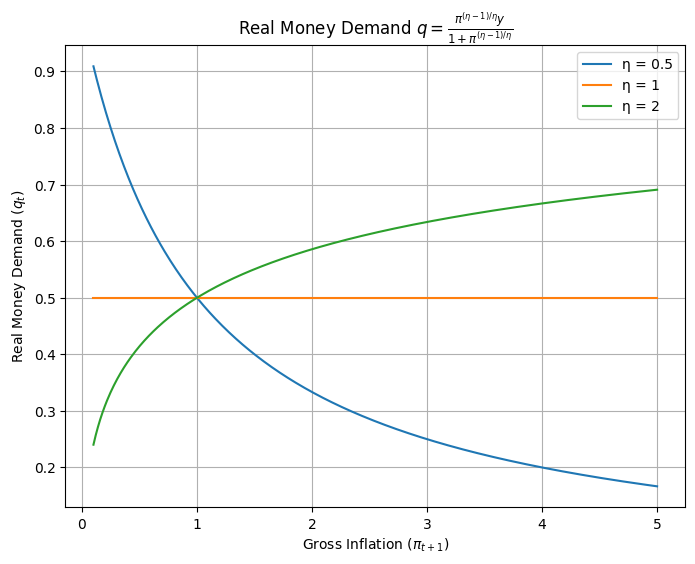

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y = 1.0                     # endowment
etas = [0.5, 1, 2]       # different values of eta to compare
pi = np.linspace(0.1, 5, 500)  # inflation rates (gross inflation)

# Money demand function
def q(pi, eta, y):
    return (pi**((eta - 1)/eta) * y) / (1 + pi**((eta - 1)/eta))

# Plot
plt.figure(figsize=(8,6))
for eta in etas:
    plt.plot(pi, q(pi, eta, y), label=f"η = {eta}")

plt.title("Real Money Demand $q = \\frac{\\pi^{(η-1)/η}y}{1+\\pi^{(η-1)/η}}$")
plt.xlabel("Gross Inflation ($\\pi_{t+1}$)")
plt.ylabel("Real Money Demand ($q_t$)")
plt.legend()
plt.grid(True)
plt.show()


Notice that the money demand curve's slope depends on the parameter $\eta$.  With CRRA utility, $1/\eta$ is the **intertemporal elasticity of substitution**.  It describes agents' preference for smooth consumption over time.  When the value of $\eta$ is high agents have a strong desire for smoothing consumption over time; therefore, when inflation rises agents' increase their holdings of fiat currency to prevent too low consumption when old in the face of less purchasing power.  Conversely, when $\eta$ is low agents' reduce money demand when inflation rises because it gives a lower rate of reutrn and they are willing to accept less consumption when old.  In the special case where $\eta=1$, we get log utility where inflation has no effect on money demand.  The negative effect on demand from lower rates of return, and the positive effect from the consumption smoothing motive perfectly cancel each other out in this special case.

We can even derive the elasticity of money demand with respect to inflation to show this relationship explicitly.  Begin with the money demand function

$$
q(\pi)=\frac{\pi^{1-\sigma}y}{1+\pi^{1-\sigma}}, \quad \text{where} \quad \sigma=1/\eta
$$

Take the derivative of $q$ with respect to $\pi$,

$$
\frac{dq}{d\pi}=\frac{y}{(1+\pi^{1-\sigma})^{2}}(1-\sigma)\pi^{-\sigma}
$$

The elasiticity is

$$
\epsilon_{q,\pi}=\frac{dq}{d\pi} \frac{\pi}{q}=\frac{1-\sigma}{1+\pi^{1-\sigma}}
$$

- When the elasiticity of substition $\sigma$ is low, $\epsilon_{q,\pi}>0$ so that money demand rises with inflation.  
- When the elasiticity of substition $\sigma$ is high, $\epsilon_{q,\pi}<0$ so that money demand rises with inflation.  
- When the elasiticity of substition $\sigma=1$, $\epsilon_{q,\pi}=0$ so that money demand is independent of inflation.  
- The elasticity falls with inflation $\pi$, shown by the term in the denominator.

We will see in REFERENCE HERE, that empirically money demand curves are downward sloping, suggesting that $\eta<1$ in reality.  

Having described money demand, we now want to see which point on the money demand curve constitutes an equilibrium.  We need to turn to the market clearing condition to find the equilibrium rate of return on money (or inflation rate).

Market clearing is

$$
\frac{\nu_{t+1}}{\nu_t}=\frac{n}{z}\frac{q_{t+1}}{q_t}
$$

Notice that if we restricted ourselves to stationary equilibria $q_t=q_{t+1}$, then the equilibrium inflation rate is simply $\pi=z/n$.  In this case, we could graphically describe the equilibrium as the intersection of the a money demand curve with the equilibrium inflation rate determined by the growth rate of the money supply and population.  In the figure below we assume that $z=1.05$ and $n=1.02$ so that equilibrium inflation is 3 percent.

<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
C:\Users\XPS\AppData\Local\Temp\ipykernel_42428\2564225850.py:24: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(pi, q_vals, color="blue", label=f"$\eta = {eta}$")
C:\Users\XPS\AppData\Local\Temp\ipykernel_42428\2564225850.py:26: SyntaxWarning: invalid escape sequence '\p'
  label=f"$\pi^* = z/n = {pi_star:.2f}$")
C:\Users\XPS\AppData\Local\Temp\ipykernel_42428\2564225850.py:29: SyntaxWarning: invalid escape sequence '\p'
  label=f"$q(\pi^*) = {q_star:.3f}$")
C:\Users\XPS\AppData\Local\Temp\ipykernel_42428\2564225850.py:32: SyntaxWarning: invalid escape sequence '\p'
  plt.xlab

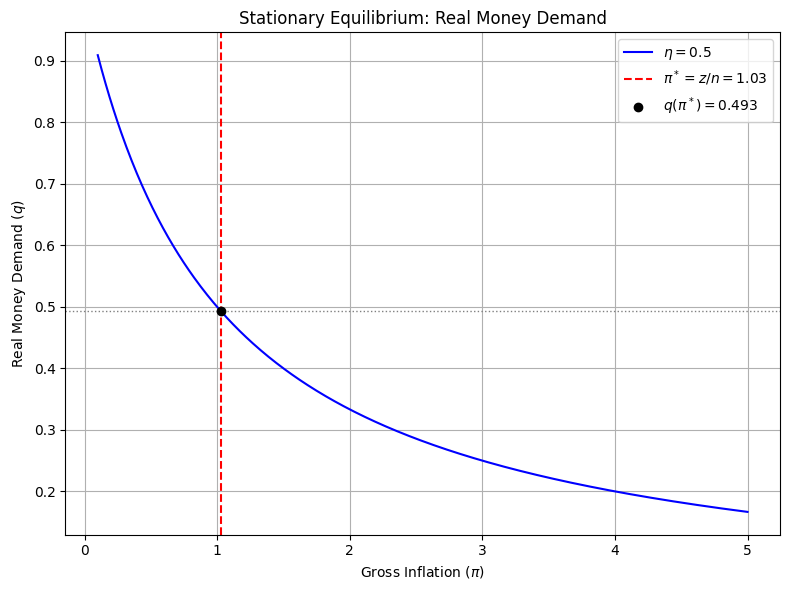

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y = 1.0            # endowment
eta = 0.5          # CRRA parameter
z = 1.05           # gross money growth rate (e.g. 5%)
n = 1.02           # gross population growth rate (e.g. 2%)
pi_star = z / n    # stationary inflation rate

# Inflation grid
pi = np.linspace(0.1, 5, 500)

# Money demand function
def q(pi, eta, y):
    return (pi**((eta - 1)/eta) * y) / (1 + pi**((eta - 1)/eta))

# Compute money demand and steady-state values
q_vals = q(pi, eta, y)
q_star = q(pi_star, eta, y)

# --- Figure 1: Money demand with steady-state markers ---
plt.figure(figsize=(8,6))
plt.plot(pi, q_vals, color="blue", label=f"$\eta = {eta}$")
plt.axvline(pi_star, color="red", linestyle="--", linewidth=1.5,
            label=f"$\pi^* = z/n = {pi_star:.2f}$")
plt.axhline(q_star, color="gray", linestyle=":", linewidth=1)
plt.scatter([pi_star], [q_star], color="black", zorder=5,
            label=f"$q(\pi^*) = {q_star:.3f}$")

plt.title("Stationary Equilibrium: Real Money Demand")
plt.xlabel("Gross Inflation ($\pi$)")
plt.ylabel("Real Money Demand ($q$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Consumption levels can be recovered from the budget constraints:

$$
\begin{align}
c_1&=y-q \\
c_2&=q/\pi
\end{align}
$$

 so that aggregate consumption is
$$
C \equiv c_1+c_2=y+\frac{1-\pi}{\pi}q
$$

The figure below plots consumption of the young, old, and aggregate consumption as a function of inflation.  

<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:44: SyntaxWarning: invalid escape sequence '\p'
C:\Users\XPS\AppData\Local\Temp\ipykernel_42428\2984064613.py:36: SyntaxWarning: invalid escape sequence '\p'
  label=f"$\pi^* = {pi_star:.2f}$")
C:\Users\XPS\AppData\Local\Temp\ipykernel_42428\2984064613.py:44: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("Gross Inflation ($\pi$)")


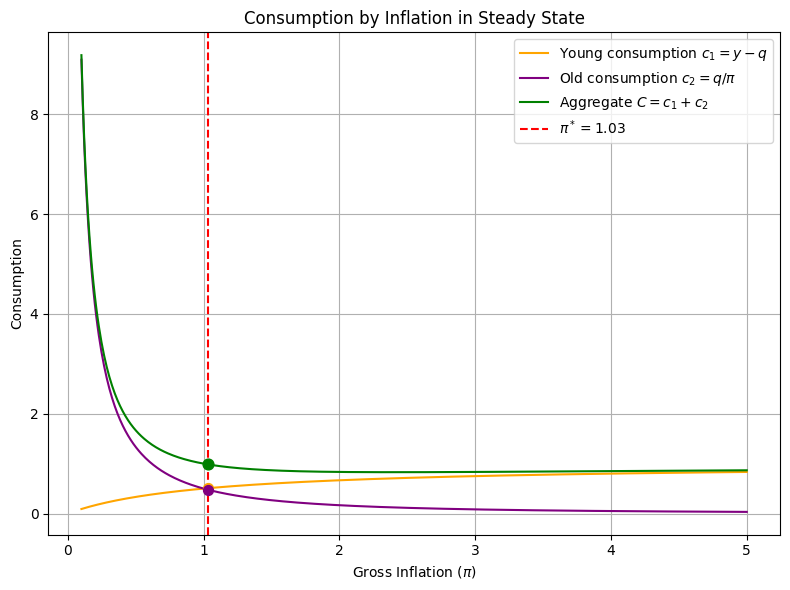

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y = 1.0            # endowment
eta = 0.5          # CRRA parameter
z = 1.05           # gross money growth rate (e.g. 5%)
n = 1.02           # gross population growth rate (e.g. 2%)
pi_star = z / n    # stationary inflation rate

# Inflation grid
pi = np.linspace(0.1, 5, 500)

# Money demand function
def q(pi, eta, y):
    return (pi**((eta - 1)/eta) * y) / (1 + pi**((eta - 1)/eta))

# Compute money demand and steady-state values
q_vals = q(pi, eta, y)
q_star = q(pi_star, eta, y)

# Consumption
c1_vals = y - q_vals          # young
c2_vals = q_vals / pi         # old
C_vals  = c1_vals + c2_vals   # aggregate
c1_star = y - q_star
c2_star = q_star / pi_star
C_star  = c1_star + c2_star

# --- Figure 2: Consumption of young, old, and aggregate ---
plt.figure(figsize=(8,6))
plt.plot(pi, c1_vals, color="orange", label="Young consumption $c_{1}=y-q$")
plt.plot(pi, c2_vals, color="purple", label="Old consumption $c_{2}=q/\\pi$")
plt.plot(pi, C_vals, color="green", label="Aggregate $C=c_1+c_2$")
plt.axvline(pi_star, color="red", linestyle="--", linewidth=1.5,
            label=f"$\pi^* = {pi_star:.2f}$")

# Mark steady-state values
plt.scatter([pi_star], [c1_star], color="orange", s=50, zorder=5)
plt.scatter([pi_star], [c2_star], color="purple", s=50, zorder=5)
plt.scatter([pi_star], [C_star],  color="green",  s=60, zorder=5)

plt.title("Consumption by Inflation in Steady State")
plt.xlabel("Gross Inflation ($\pi$)")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What we've described so far is the **stationary equilibrium**: we assumed that the equilibrium featured $q_t=q_{t+1}$.  We now relax that assumption and compute all **non-stationary equilibria** as well.  We continue working with the CRRA utility and constant money supply and population growth rates so that equilibrium rate of return on money is given by

$$
\frac{\nu_{t+1}}{\nu_t}=\frac{n}{z}\frac{q_{t+1}}{q_t}
$$

Substituting the market clearing condition into the Euler equation and re-arranging gives the first-order difference equation

$$
q_{t+1}=\frac{z}{n}\left( \frac{q_t}{(y-q_t)^{\eta}} \right)^{\frac{1}{1-\eta}}
$$

Any solution to this first-order difference equation is an equilibrium (including the stationary one we analyzed earlier).  To illustrate the solution to this equation, we use a phase diagram.  A **phase diagram** plots the value of our time $t+1$ variable on the vertical axis as a function of the time $t$ value on the horizontal axis.  Below I plot the right hand side of our first-order difference equation, which gives the value for $q_{t+1}$ as a function of $q_t$.   

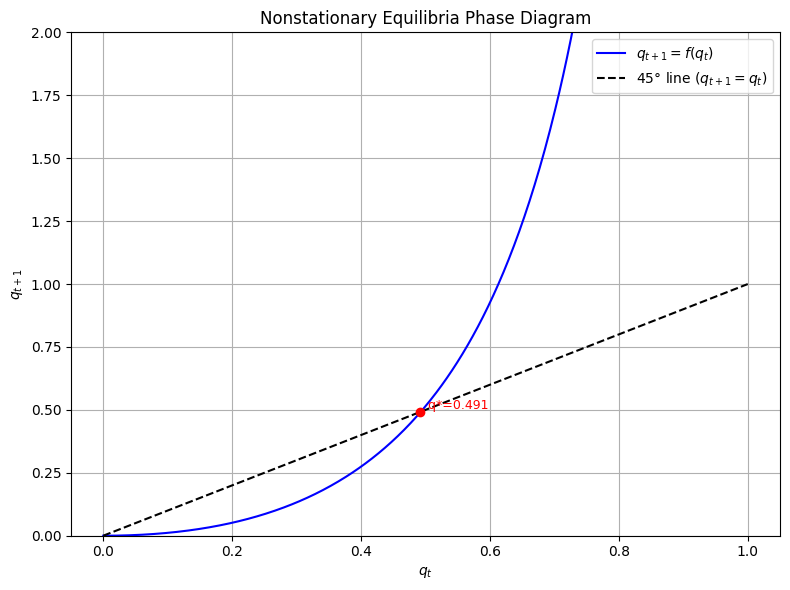

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y = 1.0      # endowment
eta = 0.5    # CRRA parameter
z = 1.05     # gross money growth
n = 1.02     # gross population growth

# Define the difference equation: q_{t+1} = (z/n) * ( q_t / (y - q_t)^eta )^{1/(1 - eta)}
def q_next(q_t, y, eta, z, n):
    return (z / n) * (q_t / (y - q_t)**eta)**(1 / (1 - eta))

# Grid for q_t
q_t = np.linspace(1e-4, y - 1e-4, 500)  # avoid dividing by zero

# Compute q_{t+1}
q_tp1 = q_next(q_t, y, eta, z, n)

# Compute 45-degree line (steady states)
plt.figure(figsize=(8,6))
plt.plot(q_t, q_tp1, label=r"$q_{t+1} = f(q_t)$", color="blue")
plt.plot(q_t, q_t, linestyle="--", color="black", label="45° line ($q_{t+1}=q_t$)")

# Highlight steady states (where f(q)=q)
# We'll find approximate intersections numerically
diff = q_tp1 - q_t
steady_indices = np.where(np.sign(diff[:-1]) != np.sign(diff[1:]))[0]
for i in steady_indices:
    q_ss = q_t[i]
    plt.scatter(q_ss, q_ss, color="red", zorder=5)
    plt.text(q_ss, q_ss, f"  q*={q_ss:.3f}", color="red", fontsize=9, va='bottom')

# Labels and layout
plt.title("Nonstationary Equilibria Phase Diagram")
plt.xlabel(r"$q_t$")
plt.ylabel(r"$q_{t+1}$")
plt.legend()
plt.grid(True)
plt.ylim(0, y*2)
plt.tight_layout()
plt.show()


Notice that the intersection of the function $q_{t+1}=f(q_t)$ with the 45 degree line indicates the same stationary solution we found earlier.  Now what if our economy does not begin at the stationary allocation $q_0 \neq q^*$?  What is the equilibrium path for $q_t$ in such a case?  We can use the phase diagram to plot this non-stationary equilibria.  Suppose, for example, that our initial condition $q_0=0.40$.  We can find the equilibrium value of $q_1$, but simply finding the value of our function $q_1=f(q_0)$ located on the vertical axis.  With this value in hand, we use the 45 degree line to plot the value $q_1$ on the horizontal axis, so we can once again use the line to locate $q_2=f(q_1)$.  Iterating in such a way traces out the non-stationary equilibrium path for $q_t$.  

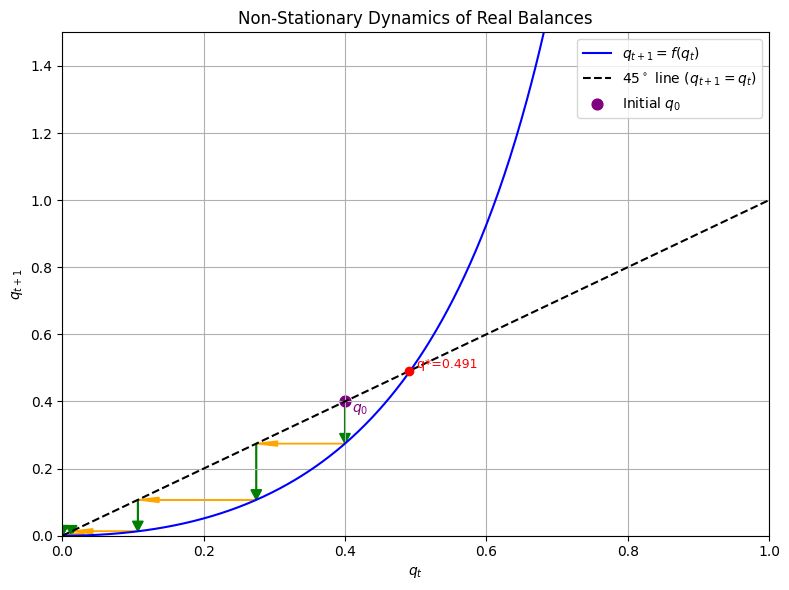

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
y = 1.0
eta = 0.5
z = 1.05
n = 1.02

# Difference equation
def q_next(q_t, y, eta, z, n):
    return (z / n) * (q_t / (y - q_t)**eta)**(1 / (1 - eta))

# Grid
q_t = np.linspace(1e-4, y - 1e-4, 500)
q_tp1 = q_next(q_t, y, eta, z, n)

# Steady states (where q_{t+1} = q_t)
diff = q_tp1 - q_t
steady_indices = np.where(np.sign(diff[:-1]) != np.sign(diff[1:]))[0]
steady_q = [q_t[i] for i in steady_indices]

# Initial condition and simulation
q0 = 0.4
T = 8  # number of iterations to display
q_path = [q0]
for t in range(T):
    q_path.append(q_next(q_path[-1], y, eta, z, n))

# --- Plot phase diagram ---
plt.figure(figsize=(8,6))
plt.plot(q_t, q_tp1, color="blue", label=r"$q_{t+1} = f(q_t)$")
plt.plot(q_t, q_t, color="black", linestyle="--", label=r"$45^\circ$ line ($q_{t+1}=q_t$)")

# Mark steady states
for q_ss in steady_q:
    plt.scatter(q_ss, q_ss, color="red", zorder=5)
    plt.text(q_ss, q_ss, f"  q*={q_ss:.3f}", color="red", fontsize=9, va='bottom')

# Plot the trajectory
for t in range(len(q_path)-1):
    q_now, q_next_val = q_path[t], q_path[t+1]

    # Vertical move: (q_t, q_t) → (q_t, q_{t+1})
    plt.arrow(q_now, q_now, 0, q_next_val - q_now,
              head_width=0.015, head_length=0.03, fc="green", ec="green", length_includes_head=True)

    # Horizontal move: (q_t, q_{t+1}) → (q_{t+1}, q_{t+1})
    if t < len(q_path)-2:
        plt.arrow(q_now, q_next_val, q_path[t+1] - q_now, 0,
                  head_width=0.015, head_length=0.03, fc="orange", ec="orange", length_includes_head=True)

# Mark initial condition
plt.scatter(q_path[0], q_path[0], color="purple", s=60, label=r"Initial $q_0$")
plt.text(q_path[0]+0.01, q_path[0]-0.03, r"$q_0$", color="purple")

# Labels and formatting
plt.title("Non-Stationary Dynamics of Real Balances")
plt.xlabel(r"$q_t$")
plt.ylabel(r"$q_{t+1}$")
plt.xlim(0, y)
plt.ylim(0, y*1.5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Notice that the non-stationary equilibrium converges to the steady state $q=0$.  That is, it converges to the **non-monetary equilibrium**: an equilibrium where money has no value so that $q=0$.  In fact, for any $q_0<q^*$, the non-stationary equilibrium will behave similarly.  Therefore, we say that the stationary monetary equilibrium is **unstable**. 

Notice that the value of our exogenous variables $(y,z,n)$ will shift the curve, but not alter the fundamental dynamics.  Increasing money supply $z$,for example, would shift the phase line to the left resulting in a lower value for stationary money balances $q^*$.  Nevertheless, any small perturbation causing $q$ to drop below $q^*$ would trigger the non-stationary equilibrium which converges to the non-monetary equilibrium.

C:\Users\XPS\AppData\Local\Temp\ipykernel_27264\3511899077.py:25: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_low, = fsolve(eq, last_low + 1e-6, args=(q_t,))
C:\Users\XPS\AppData\Local\Temp\ipykernel_27264\3511899077.py:32: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  y_high, = fsolve(eq, last_high - 1e-6, args=(q_t,))
C:\Users\XPS\AppData\Local\Temp\ipykernel_27264\3511899077.py:11: RuntimeWarning: invalid value encountered in power
  return q_next / (alpha + q_next)**eta - q_t / (1 - q_t)**eta


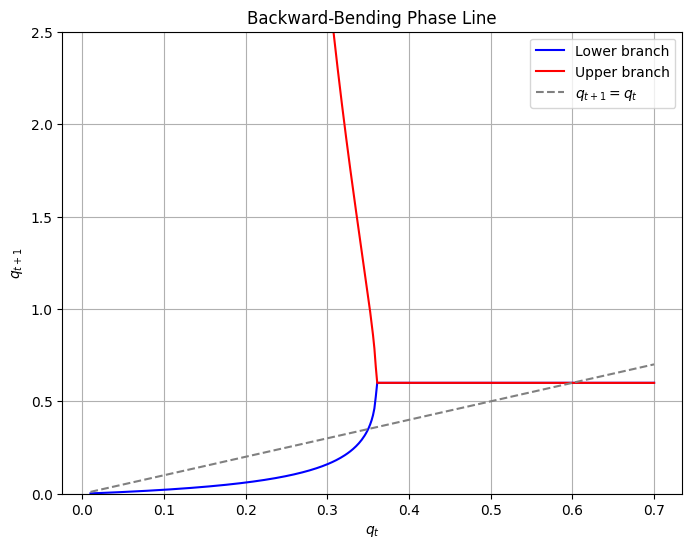

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
eta = 1.5
alpha = 0.3

# Implicit equation: q_{t+1} as function of q_t
def eq(q_next, q_t):
    return q_next / (alpha + q_next)**eta - q_t / (1 - q_t)**eta

# Focused q_t range
q_t_vals = np.linspace(0.01, 0.7, 400)

q_next_low = []
q_next_high = []

# Track last solution to ensure continuity
last_low = 0.0
last_high = 1.0

for q_t in q_t_vals:
    # Low branch: solve and filter
    y_low, = fsolve(eq, last_low + 1e-6, args=(q_t,))
    # Keep only reasonable solutions (avoid huge jumps)
    if y_low < 1.0:  
        q_next_low.append(y_low)
        last_low = y_low
    
    # High branch: solve and filter
    y_high, = fsolve(eq, last_high - 1e-6, args=(q_t,))
    if y_high > 0.5:  # avoid unrealistic small spikes
        q_next_high.append(y_high)
        last_high = y_high

# Convert to numpy arrays
q_next_low = np.array(q_next_low)
q_next_high = np.array(q_next_high)
q_t_low = np.array(q_t_vals[:len(q_next_low)])
q_t_high = np.array(q_t_vals[:len(q_next_high)])

# Plot
plt.figure(figsize=(8,6))
plt.plot(q_t_low, q_next_low, label='Lower branch', color='blue')
plt.plot(q_t_high, q_next_high, label='Upper branch', color='red')
plt.plot(q_t_vals, q_t_vals, '--', label=r'$q_{t+1} = q_t$', color='gray')

plt.ylim(0, 2.5)  
plt.xlabel(r'$q_t$')
plt.ylabel(r'$q_{t+1}$')
plt.title('Backward-Bending Phase Line')
plt.legend()
plt.grid(True)
plt.show()
